In [27]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw


In [143]:
agile_df = pd.read_csv("finetuning_set_smiles_plus_features.csv")
ionizable_lipid_smiles_list = list(agile_df['smiles'].values)
ionizable_lipid_mol_list = [Chem.MolFromSmiles(i) for i in ionizable_lipid_smiles_list]


In [128]:
def get_matching_indices(mol_list, substructure):
    match_vec = np.zeros((len(mol_list),))
    for i in range(len(mol_list)):
        matches = mol_list[i].GetSubstructMatches(substructure)
        if len(matches) > 0:
            match_vec[i] = 1

    return np.where(match_vec > 0)[0]

In [129]:
def assign_one_hot_mat(full_mol_list, substructure_mol_list):
    assigned_mols = np.zeros((len(full_mol_list),))
    assigned_substructures = np.zeros((len(substructure_mol_list),))
    num_matching_mols = np.zeros((len(substructure_mol_list),))
    one_hot_mat = np.zeros((len(full_mol_list),len(substructure_mol_list)))


    while np.sum(assigned_substructures) < len(substructure_mol_list):
        num_matching_mols = np.zeros((len(substructure_mol_list),))
        for i in range(len(substructure_mol_list)):
            if assigned_substructures[i] == 0:
                matches = get_matching_indices(full_mol_list, substructure_mol_list[i])
                num_matching_mols[i] = len(matches)

        print(num_matching_mols)
        most_unique_substructure = np.where(num_matching_mols == np.min(num_matching_mols[np.nonzero(num_matching_mols)]))[0].min()
        print(most_unique_substructure)

        assigned_substructure = substructure_mol_list[most_unique_substructure]
        assigned_substructures[most_unique_substructure] = 1
        for i in range(len(full_mol_list)):
            if assigned_mols[i] == 0:
                matches = full_mol_list[i].GetSubstructMatches(assigned_substructure)
                if len(matches) > 0:
                    assigned_mols[i] = 1
                    one_hot_mat[i,most_unique_substructure] = 1

    return one_hot_mat


In [130]:
amine_smiles_list = [
    "CN(C)CCN",
    "NCCCN1CCCC1",
    "CCN(CC)CCCN",
    "CCN(CC)CCN",
    "NCCN(CCN)CCN",
    "CN(C)CCCN",
    "NCCCN1CCOCC1",
    "CCCCN(CCCC)CCCN",
    "Cc1cc(N)n(C)n1",
    "NCCN1CCCC1",
    "NN1CCOCC1",
    "CN1CCC(N)CC1",
    "NN1CCCCC1",
    "Nc1cn[nH]c1",
    "NCCN1CCCCC1",
    "CC(C)N(CCN)C(C)C",
    "CN(CCCN)CCCN",
    "CCN1CCCC1CN",
    "NCCN1CCNCC1",
    "NC1CCNCC1"
]

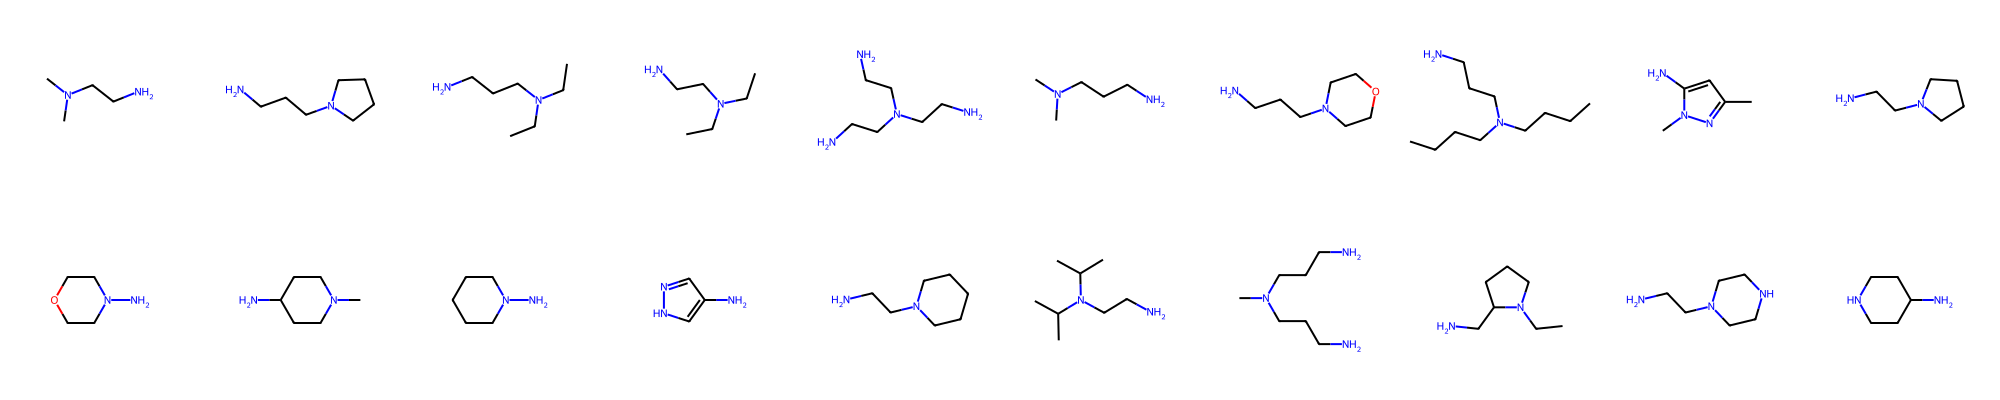

In [131]:
amine_mols = [Chem.MolFromSmiles(i) for i in amine_smiles_list]
amine_grid_image = Draw.MolsToGridImage(amine_mols, molsPerRow=10)
amine_grid_image

In [132]:
amine_mat = assign_one_hot_mat(ionizable_lipid_mol_list, amine_mols)

[480.  60. 240. 420.  60. 420.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
1
[480.   0. 240. 420.  60. 420.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
4
[480.   0. 240. 420.   0. 420.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
6
[480.   0. 240. 420.   0. 420.   0.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
7
[480.   0. 240. 420.   0. 420.   0.   0.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
8
[480.   0. 240. 420.   0. 420.   0.   0.   0.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
9
[480.   0. 240. 420.   0. 420.   0.   0.   0.   0.  60.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
10
[480.   0. 240. 420.   0. 420.   0.   0.   0.   0.   0.  60.  60.  60.
  60.  60.  60.  60.  60. 120.]
11
[480.   0. 240. 420.   0. 420.   0.   0.   0.   0.   0.   0.  60.  60.
  60.  60.  60.  60.  60. 120.]
12
[480.   0. 240. 420.   0. 420.   0.   0.   0.   0.  

In [133]:
print(amine_mat.sum())
print(amine_mat.sum(axis=0))
print(np.where(amine_mat.sum(axis=1)!=1))

1200.0
[60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60.]
(array([], dtype=int64),)


In [134]:
# Terminal aldehyde converted to a nitrogen via reaction
aldehyde_smiles_list = [
    "CCCCCCCCC(=O)OCCCCCCN",
    "CCCCCC(C)CCC(=O)OCCCCCCN",
    "CCCCCCCCCC(=O)OCCCCCCN",
    "CCCCCCC\C=C\C(=O)OCCCCCCN",
    "CCCCCCC/C=C/C(=O)OCCCCCCN",
    "CCCCCCCCCCC(=O)OCCCCCCN",
    "C#CCCCCCCCCC(=O)OCCCCCCN",
    "C=CCCCCCCCCC(=O)OCCCCCCN",
    "CCCCCCCCCCCCCCCC(=O)OCCCCCCN",
    "CCCCCCCCCCCCCCCCCC(=O)OCCCCCCN",
    "CCCCCCC\C=C\CCCCCCCC(=O)OCCCCCCN",
    "CCCC\C=C\C\C=C\CCCCCCCC(=O)OCCCCCCN"
]

In [153]:
aldehyde_mol_list = [Chem.MolFromSmiles(i) for i in aldehyde_smiles_list]
aldehyde_grid_image = Draw.MolsToGridImage(aldehyde_mol_list, molsPerRow=2)
# aldehyde_grid_image

In [154]:
aldehyde_mat = assign_one_hot_mat(ionizable_lipid_mol_list, aldehyde_mol_list)

[1000.  100.  600.  200.  200.  300.  100.  100.  200.  100.  100.  100.]
1
[1000.    0.  600.  200.  200.  300.  100.  100.  200.  100.  100.  100.]
6
[1000.    0.  600.  200.  200.  300.    0.  100.  200.  100.  100.  100.]
7
[1000.    0.  600.  200.  200.  300.    0.    0.  200.  100.  100.  100.]
9
[1000.    0.  600.  200.  200.  300.    0.    0.  200.    0.  100.  100.]
10
[1000.    0.  600.  200.  200.  300.    0.    0.  200.    0.    0.  100.]
11
[1000.    0.  600.  200.  200.  300.    0.    0.  200.    0.    0.    0.]
3
[1000.    0.  600.    0.  200.  300.    0.    0.  200.    0.    0.    0.]
4
[1000.    0.  600.    0.    0.  300.    0.    0.  200.    0.    0.    0.]
8
[1000.    0.  600.    0.    0.  300.    0.    0.    0.    0.    0.    0.]
5
[1000.    0.  600.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
2
[1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0


In [155]:
aldehyde_mat[1000:1100,3] = 0
aldehyde_mat[1000:1100,4] = 1

In [156]:
print(aldehyde_mat.sum())
print(aldehyde_mat.sum(axis=0))
print(np.where(aldehyde_mat.sum(axis=1)!=1))

1200.0
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
(array([], dtype=int64),)


In [182]:
# Terminal cyanide converted to single bond via reaction
isocyanide_smiles_list = [
    "CCCCCCCCCCCCN",
    "CCCCCCCCCCCCCCN",
    "CCCCCCCCCCCCCCCCN",
    "CCCCCCCCCCCCCCCCCCN",
    "CCCCCCCC\C=C\CCCCCCCCN"
]

In [183]:
isocyanide_mol_list = [Chem.MolFromSmiles(i) for i in isocyanide_smiles_list]
isocyanide_grid_image = Draw.MolsToGridImage(isocyanide_mol_list, molsPerRow=2)
# isocyanide_grid_image

In [184]:
isocyanide_mat = assign_one_hot_mat(ionizable_lipid_mol_list, isocyanide_mol_list)

[960. 720. 480. 240. 240.]
3
[960. 720. 480.   0. 240.]
4
[960. 720. 480.   0.   0.]
2
[960. 720.   0.   0.   0.]
1
[960.   0.   0.   0.   0.]
0


In [185]:
print(isocyanide_mat.sum())
print(isocyanide_mat.sum(axis=0))
print(np.where(isocyanide_mat.sum(axis=1)!=1))

1200.0
[240. 240. 240. 240. 240.]
(array([], dtype=int64),)


In [186]:
full_onehot_mat = np.hstack((amine_mat,aldehyde_mat,isocyanide_mat))

In [188]:
print(full_onehot_mat.sum())
print(full_onehot_mat.sum(axis=0))
print(np.where(full_onehot_mat.sum(axis=1)!=3))

3600.0
[ 60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
  60.  60.  60.  60.  60.  60. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 240. 240. 240. 240. 240.]
(array([], dtype=int64),)


In [189]:
np.savetxt("onehot_encoding.csv", full_onehot_mat, delimiter=",")